In [1]:
# Import Dependencies
%matplotlib 
#inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
Base.prepare(autoload_with=engine)


In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

## Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Query the Measurement table. use a .max to find the last date.
last_date = session.query(func.max(Measurement.date)).scalar()
print(last_date)

2017-08-23


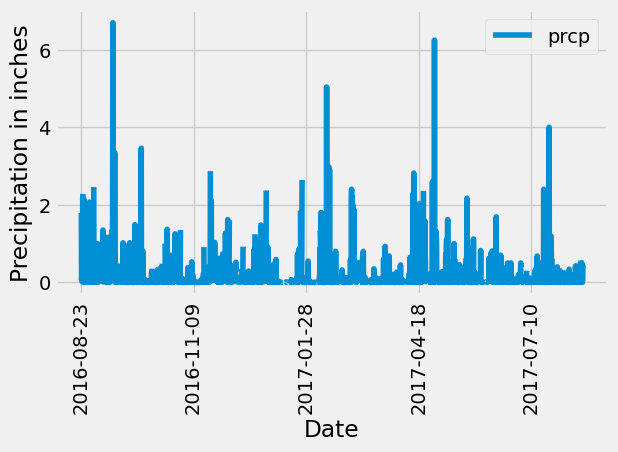

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
# use .timedelta to limit the new variable to the last 365 days
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Query the Measurement table on the date and prcp (precipitaiton) columns. Filter by the one_year date variable crated above. 
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()
results
# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results)

# Sort the dataframe by date
results_df = results_df.sort_values("date")
results_df

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(x="date", y="prcp", rot=90)
plt.ylabel("Precipitation in inches")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
# use the .describe function to quickly create a stats table
results_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis


In [12]:
# Design a query to calculate the total number of stations in the dataset
# Perform a .count on the Station table, station column.
station_count = session.query(func.count(Station.station)).all()[0][0]
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Query the Measurement table and .count the station column. Group by the station and order descending. 
# The most active stations will be the top result. 
station_list = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Use indexes on the station_list variable to extract the most active station. 
most_active = station_list[0][0]
most_active

'USC00519281'

In [15]:
# Using the most active station id from the previous query, calculate the 
# lowest, highest, and average temperature.
# Query and filter the Measurement tobs (temp observed) column.
# Filter using the most_active variable created above. 
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
            filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

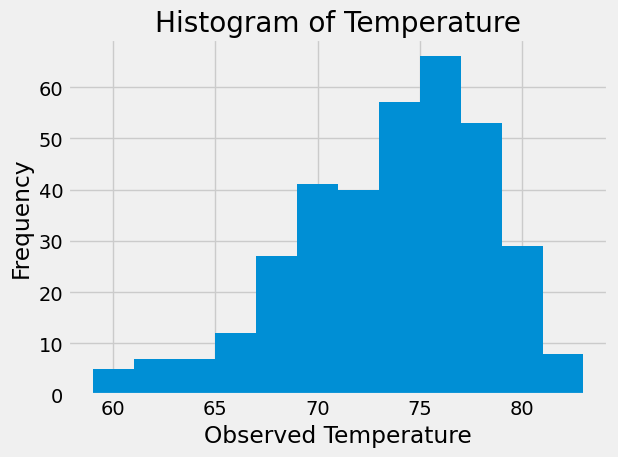

In [16]:
# Using the most active station id, Query the last 12 months of temperature observation 
# data for this station and plot the results as a histogram
most_active_year = session.query(Measurement.tobs).\
                        filter(Measurement.station == most_active, Measurement.date >= one_year).all()
most_active_year_df = pd.DataFrame(most_active_year)
plt.hist(most_active_year_df, bins=12)
plt.title("Histogram of Temperature")
plt.ylabel("Frequency")
plt.xlabel("Observed Temperature")
plt.tight_layout()
plt.show()

In [18]:
most_active_year_df


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


In [17]:
# Close Session
session.close()